## Problem Statement

creditcard fraud detection.

## Objective

The Credit Card Fraud Detection Project aims to implement an advanced system for the identification and prevention of fraudulent credit card transactions.

## Feature 

Unnamed: 0: This column seems to be an unnamed or default index column that might have been added during data processing. It doesn't provide specific information about the transactions.

trans_date_trans_time: Date and time of the transaction. This column likely combines both the date and time information of the transaction.

cc_num: Credit card number used for the transaction. This information is often anonymized or partially redacted for privacy reasons in real datasets.

merchant: The name or identifier of the merchant where the transaction took place.

category: The category or type of the transaction (e.g., retail, dining, entertainment).

amt: The transaction amount, indicating the monetary value of the transaction.

first: The first name of the person associated with the credit card.

last: The last name of the person associated with the credit card.

gender: The gender of the cardholder.

street: The street address of the cardholder.

city: The city where the cardholder resides.

state: The state where the cardholder resides.

zip: The ZIP code of the cardholder's location.

lat: Latitude of the cardholder's location.

long: Longitude of the cardholder's location.

city_pop: The population of the city where the cardholder resides.

job: The occupation or job of the cardholder.

dob: Date of birth of the cardholder.

trans_num: Transaction number or identifier.

unix_time: The transaction time in Unix timestamp format (seconds since January 1, 1970).

merch_lat: Latitude of the merchant location.

merch_long: Longitude of the merchant location.

is_fraud: Binary indicator (0 or 1) indicating whether the transaction is fraudulent (1) or not (0).

In [82]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import great_circle
from category_encoders import WOEEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree

In [83]:
df=pd.read_csv(r"C:\Users\sanyu\Downloads\archive (10)\fraudTest.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [84]:
df.isnull().sum() 

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_car

In [11]:
df.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care 

In [85]:
df['is_fraud'].value_counts()  

is_fraud
0    553574
1      2145
Name: count, dtype: int64

here 0 menas not fruad conut is high and 1 means fraud count is low so we say that data is imbalance.

In [86]:
legit = df[df.is_fraud == 0]
fraud = df[df.is_fraud == 1] 

In [87]:
legit_sample = legit.sample(n=2145,random_state=18) 

sample method is use here to handel imbalance data.

In [88]:
df= pd.concat([legit_sample, fraud], axis=0) 

In [89]:
df["is_fraud"].value_counts() 

is_fraud
0    2145
1    2145
Name: count, dtype: int64

In [90]:
df.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True) 

In [91]:
#Change date type
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed')

In [92]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month

In [93]:
#clean merchant column
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [94]:
df[['merchant']].head()

,merchant
161193,"Little, Gutmann and Lynch"
88214,Ziemann-Waters
278961,"Bradtke, Torp and Bahringer"
474228,Kerluke-Abshire
237234,Harris Group


In [95]:
#Date of birth --> Age of customer
df['dob'] = pd.to_datetime(df['dob'],format='mixed')
df['age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year).astype(int)
df.drop(columns='dob',inplace=True) 

In [23]:
pip install geopy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
#Location between customer home and merchant
df['distance_km'] = df.apply(lambda col : round(great_circle((col['lat'],col['long']),
                                         (col['merch_lat'],col['merch_long'])).kilometers,2),axis=1) 

In [97]:
df.drop(columns=['lat','long','merch_lat','merch_long'],inplace=True) 

In [98]:
df.head(5) 

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,hour,day,month,age,distance_km
161193,2020-08-16 23:57:04,30407675418785,"Little, Gutmann and Lynch",shopping_net,3.13,F,Breesport,14816,520,Psychotherapist,0,23,Sunday,8,29,82.06
88214,2020-07-21 15:11:33,3538520143479972,Ziemann-Waters,health_fitness,58.86,F,Clay Center,43408,269,Insurance underwriter,0,15,Tuesday,7,55,39.40
278961,2020-10-03 16:10:58,5596347693144598,"Bradtke, Torp and Bahringer",personal_care,81.86,M,Kenner,70062,68211,"Engineer, petroleum",0,16,Saturday,10,79,84.06
474228,2020-12-14 03:51:22,213180742685905,Kerluke-Abshire,shopping_net,8.62,F,Carlotta,95528,1139,"Therapist, occupational",0,3,Monday,12,69,69.96
237234,2020-09-14 20:54:41,30408301059761,Harris Group,food_dining,2.79,M,Cross,29436,4471,Occupational hygienist,0,20,Monday,9,47,82.97


In [99]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trans_date_trans_time,4290,2020-09-24 17:01:18.753613056,2020-06-21 12:30:28,2020-08-05 10:55:37.249999872,2020-09-24 02:08:18,2020-11-17 15:13:45.500000,2020-12-31 23:32:06,NaN
cc_num,4290.0,404272959144371648.0,60416207185.0,38014427445058.0,3501365119557234.0,4482427013979020.0,4992346398065154048.0,1297634021959901696.0
amt,4290.0,298.185804,1.0,20.675,88.505,442.9525,4688.36,377.235132
zip,4290.0,48463.864336,1257.0,25213.0,48088.0,70808.0,99921.0,26953.82355
city_pop,4290.0,78026.052214,23.0,888.0,2691.0,14871.0,2906700.0,279246.817025
is_fraud,4290.0,0.5,0.0,0.0,0.5,1.0,1.0,0.500058
hour,4290.0,13.358741,0.0,4.0,15.0,22.0,23.0,8.437099
month,4290.0,9.284848,6.0,8.0,9.0,11.0,12.0,1.89832
age,4290.0,47.873427,15.0,34.0,46.0,59.0,96.0,17.506541
distance_km,4290.0,76.100128,2.08,55.46,78.455,98.49,143.32,29.118274


In [100]:
df.describe(include="object").T

,count,unique,top,freq
merchant,4290,676,"Mosciski, Ziemann and Farrell",24
category,4290,14,grocery_pos,692
gender,4290,2,F,2344
city,4290,756,Birmingham,37
job,4290,450,Systems developer,40
day,4290,7,Tuesday,778


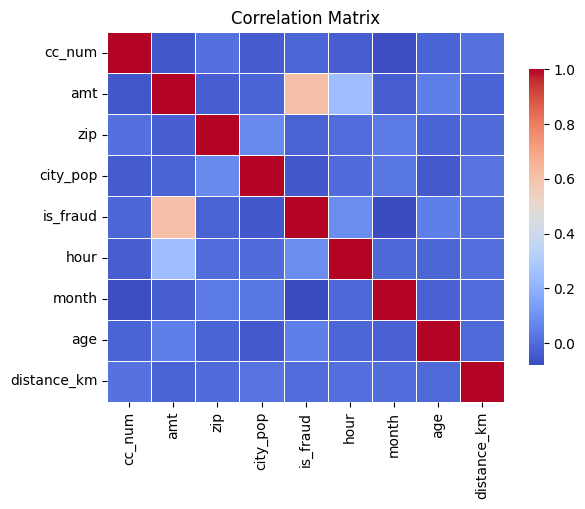

In [101]:
#Check corr between numeric values
sns.heatmap(df.select_dtypes(include='number').corr(),
            annot=None,cmap='coolwarm',fmt='.2f',linewidths=0.5,cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.show()    

In [102]:
df.select_dtypes(include='number').corr() 

,cc_num,amt,zip,city_pop,is_fraud,hour,month,age,distance_km
cc_num,1.000000,-0.050933,0.011707,-0.039206,-0.014525,-0.035033,-0.071475,-0.019373,0.017044
amt,-0.050933,1.000000,-0.030445,-0.017190,0.610223,0.245365,-0.034695,0.048680,-0.019046
zip,0.011707,-0.030445,1.000000,0.078981,-0.022299,0.002513,0.037535,-0.015739,-0.001144
city_pop,-0.039206,-0.017190,0.078981,1.000000,-0.048338,0.000294,0.030520,-0.043981,0.019700
is_fraud,-0.014525,0.610223,-0.022299,-0.048338,1.000000,0.086403,-0.078842,0.049418,0.003914
hour,-0.035033,0.245365,0.002513,0.000294,0.086403,1.000000,-0.008347,-0.015544,0.008042
month,-0.071475,-0.034695,0.037535,0.030520,-0.078842,-0.008347,1.000000,-0.026936,0.001821
age,-0.019373,0.048680,-0.015739,-0.043981,0.049418,-0.015544,-0.026936,1.000000,-0.005851
distance_km,0.017044,-0.019046,-0.001144,0.019700,0.003914,0.008042,0.001821,-0.005851,1.000000


In [31]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,hour,day,month,age,distance_km
161193,2020-08-16 23:57:04,30407675418785,"Little, Gutmann and Lynch",shopping_net,3.13,F,Breesport,14816,520,Psychotherapist,0,23,Sunday,8,29,82.06
88214,2020-07-21 15:11:33,3538520143479972,Ziemann-Waters,health_fitness,58.86,F,Clay Center,43408,269,Insurance underwriter,0,15,Tuesday,7,55,39.40
278961,2020-10-03 16:10:58,5596347693144598,"Bradtke, Torp and Bahringer",personal_care,81.86,M,Kenner,70062,68211,"Engineer, petroleum",0,16,Saturday,10,79,84.06
474228,2020-12-14 03:51:22,213180742685905,Kerluke-Abshire,shopping_net,8.62,F,Carlotta,95528,1139,"Therapist, occupational",0,3,Monday,12,69,69.96
237234,2020-09-14 20:54:41,30408301059761,Harris Group,food_dining,2.79,M,Cross,29436,4471,Occupational hygienist,0,20,Monday,9,47,82.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,2020-12-22 22:05:48,2242176657877538,"Willms, Kris and Bergnaum",shopping_pos,1041.51,M,Senatobia,38668,14462,Database administrator,1,22,Tuesday,12,61,6.95
517274,2020-12-22 22:18:07,2242176657877538,Kuhn LLC,shopping_pos,868.09,M,Senatobia,38668,14462,Database administrator,1,22,Tuesday,12,61,75.96
517341,2020-12-22 22:31:48,2242176657877538,"Mosciski, Ziemann and Farrell",shopping_net,1039.42,M,Senatobia,38668,14462,Database administrator,1,22,Tuesday,12,61,36.53
517529,2020-12-22 23:06:03,2242176657877538,Bauch-Raynor,grocery_pos,289.27,M,Senatobia,38668,14462,Database administrator,1,23,Tuesday,12,61,48.81


In [32]:
# sns.catplot(data=df,x='amt',col='is_fraud',kind='box',sharex=False,palette="deep") 

([<matplotlib.patches.Wedge at 0x22dafa1f350>,
 [Text(-0.15973503230039812, 1.0883403509270393, 'F'),
  Text(0.15973503230039776, -1.0883403509270393, 'M')],
 [Text(-0.08712819943658077, 0.5936401914147486, '54.6%'),
  Text(0.08712819943658058, -0.5936401914147487, '45.4%')])

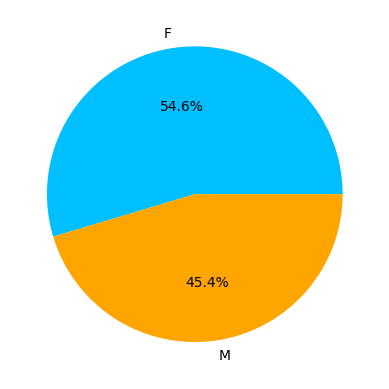

In [103]:
count=df["gender"].value_counts()
count
a=["deepskyBlue","orange"]
plt.pie(count,labels=count.index,autopct="%1.1f%%",colors=a) 

([<matplotlib.patches.Wedge at 0x22daf924950>,
 [Text(6.735557395310444e-17, 1.1, '0'),
  Text(-2.0206672185931328e-16, -1.1, '1')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

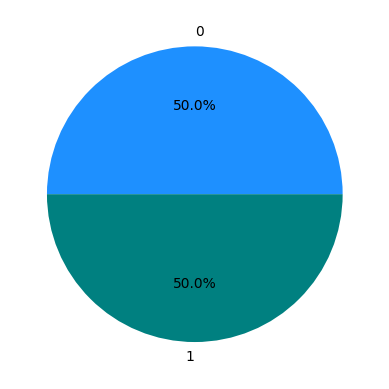

In [104]:
count=df["is_fraud"].value_counts()
count
a1=["dodgerblue","teal"]
plt.pie(count,labels=count.index,autopct="%1.1f%%",colors=a1) 

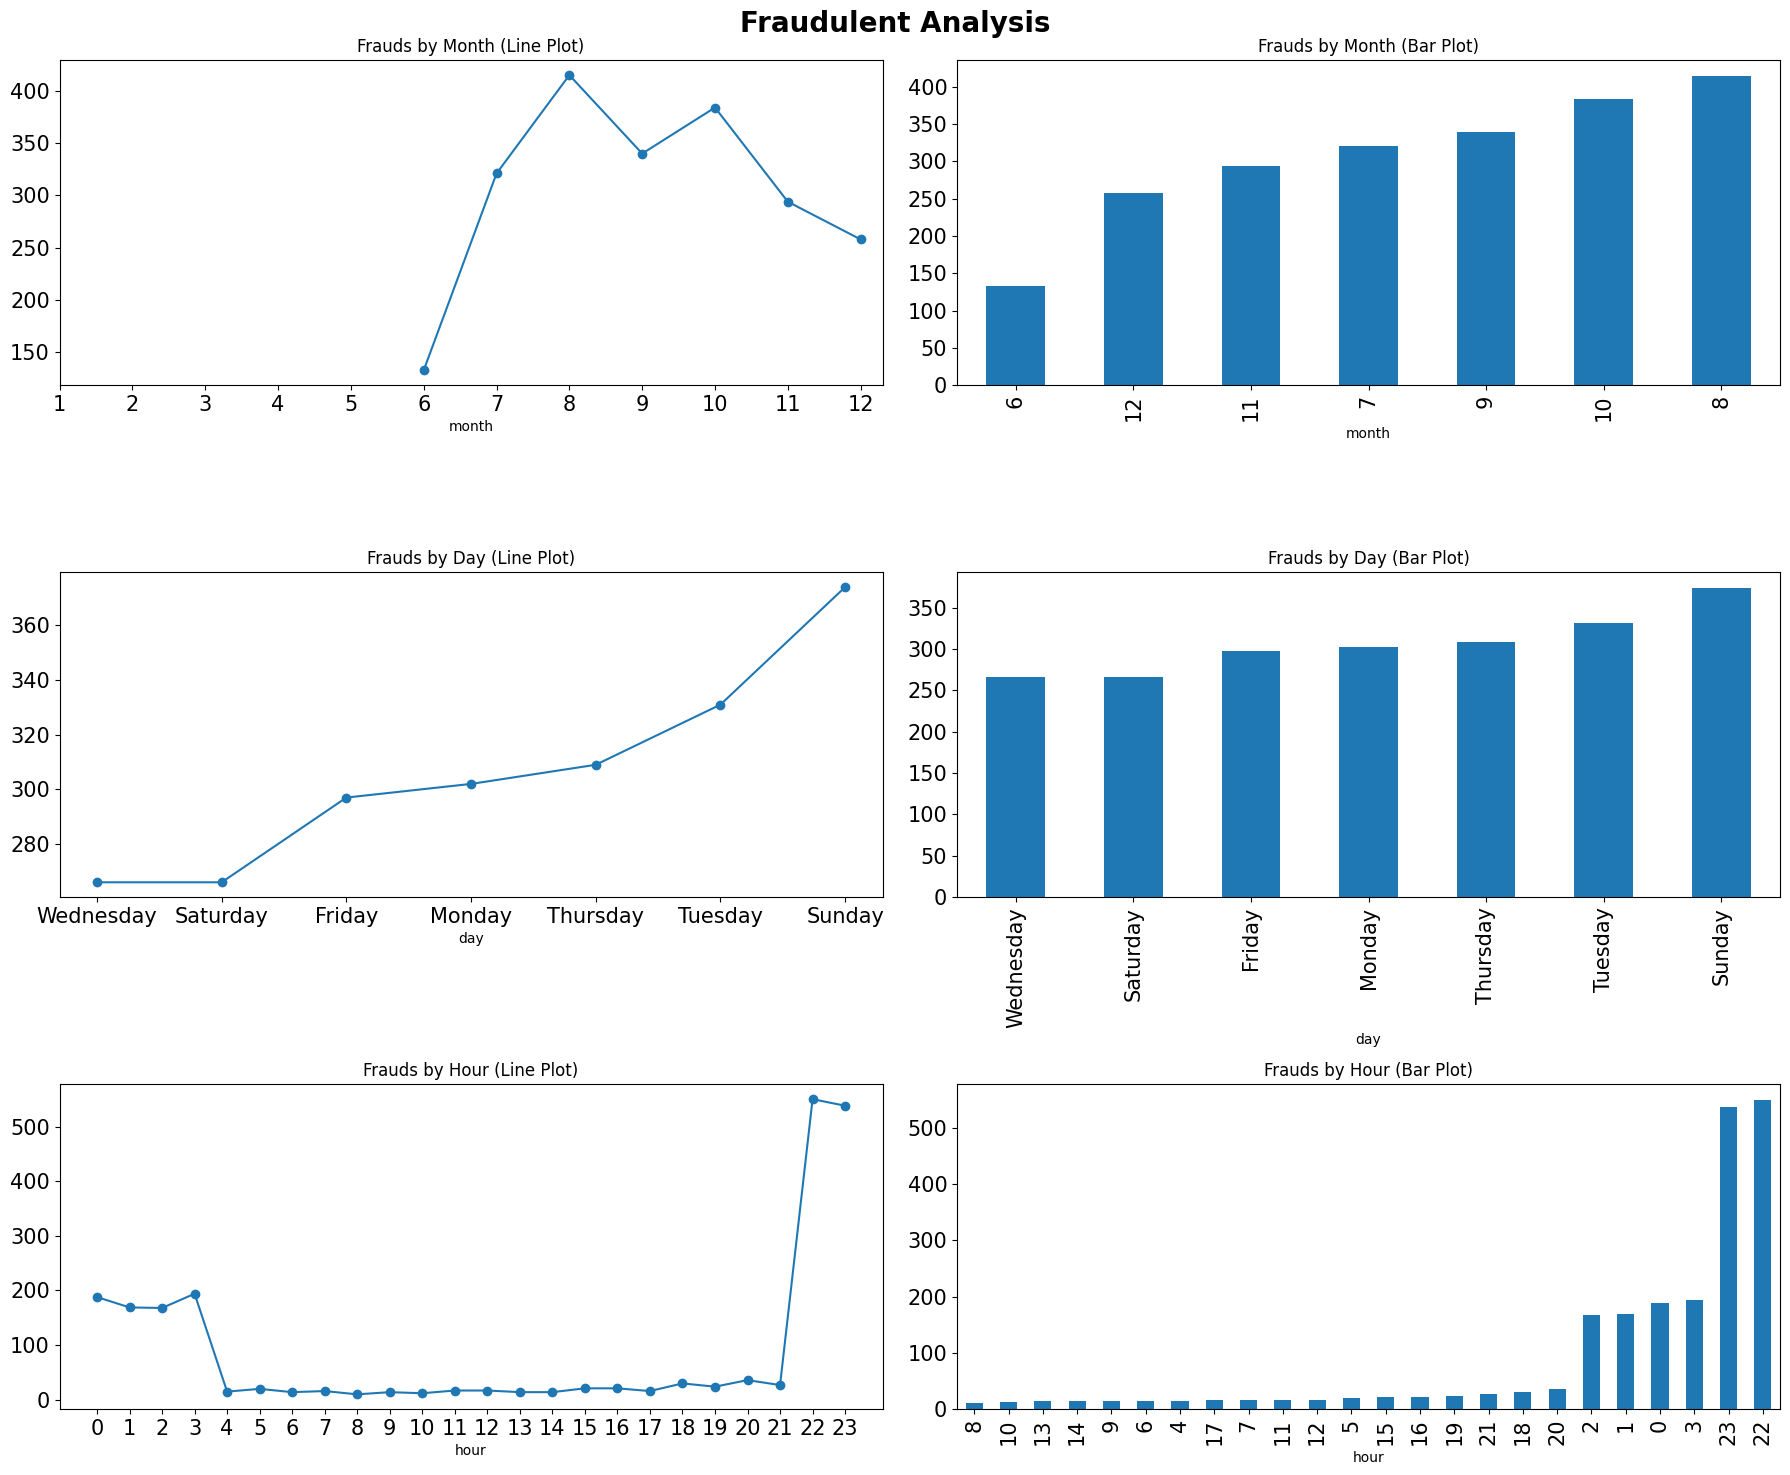

In [122]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18, 15))
axs = fig.subplots(3, 2)

# Month
df.loc[df['is_fraud'] == 1, 'month'].value_counts().sort_index().plot(
    kind='line', ax=axs[0, 0], marker='o', fontsize=15
)
axs[0, 0].set_xticks(range(1, 13))
axs[0, 0].set_title('Frauds by Month (Line Plot)')

df.loc[df['is_fraud'] == 1, 'month'].value_counts(ascending=True).plot(
    kind='bar', ax=axs[0, 1], fontsize=15
)
axs[0, 1].set_title('Frauds by Month (Bar Plot)')

# Day
df.loc[df['is_fraud'] == 1, 'day'].value_counts(ascending=True).plot(
    kind='line', ax=axs[1, 0], marker='o', fontsize=15
)
axs[1, 0].set_title('Frauds by Day (Line Plot)')

df.loc[df['is_fraud'] == 1, 'day'].value_counts(ascending=True).plot(
    kind='bar', ax=axs[1, 1], fontsize=15
)
axs[1, 1].set_title('Frauds by Day (Bar Plot)')

# Hour
df.loc[df['is_fraud'] == 1, 'hour'].value_counts().sort_index().plot(
    kind='line', ax=axs[2, 0], marker='o', fontsize=15
)
axs[2, 0].set_xticks(range(0, 24))
axs[2, 0].set_title('Frauds by Hour (Line Plot)')

df.loc[df['is_fraud'] == 1, 'hour'].value_counts(ascending=True).plot(
    kind='bar', ax=axs[2, 1], fontsize=15
)
axs[2, 1].set_title('Frauds by Hour (Bar Plot)')

fig.suptitle('Fraudulent Analysis', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

here we conclude that the most fraud 

on august

on sunday

at 10 pm

In [36]:
wm=df.loc[df['is_fraud']==1,['gender']].value_counts() 

In [37]:
a2=["teal","purple"]

([<matplotlib.patches.Wedge at 0x22d93c01d50>,
 [Text(-0.14697226004296324, 1.090137218325227, "('F',)"),
  Text(0.14697215797694976, -1.0901372320857585, "('M',)")],
 [Text(-0.08016668729616175, 0.5946203009046692, '154%'),
  Text(0.08016663162379077, -0.5946203084104137, '145%')])

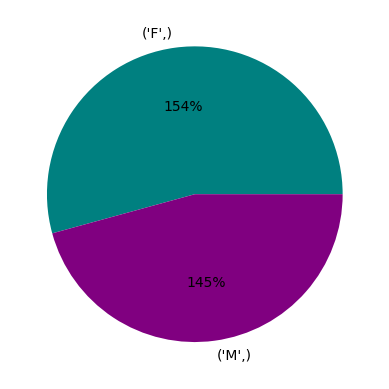

In [38]:
plt.pie(wm,labels=wm.index,autopct="1%.i%%",colors=a2)

here we conclude that the fraud happen with women is more than men.

C:\Users\sanyu\AppData\Local\Temp\ipykernel_1032\3026912200.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='is_fraud', y='city_pop',errorbar=None,palette="Set1")


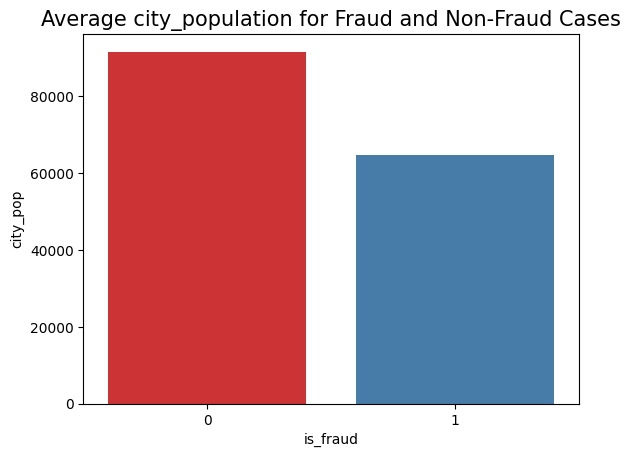

In [39]:
sns.barplot(data=df,x='is_fraud', y='city_pop',errorbar=None,palette="Set1")
plt.title('Average city_population for Fraud and Non-Fraud Cases',fontsize=15)
plt.show()

fraud_population = df[df['is_fraud'] == 1]['city_pop']
non_fraud_population = df[df['is_fraud'] == 0]['city_pop']

here we conclude that fraud is in low population.

here we see that there is positive correlation in amt and fraud.

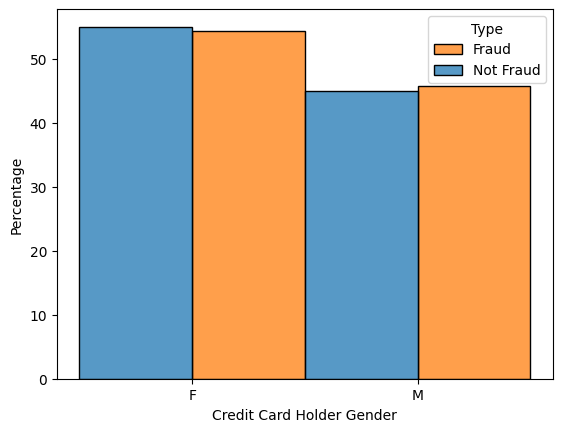

In [40]:
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']) 

here the fraud is more in women.

([<matplotlib.patches.Wedge at 0x22db1615990>,
 [Text(0.9617560443543396, 0.5338776181372412, 'grocery_pos'),
  Text(0.08128496972555156, 1.0969925950965742, 'shopping_net'),
  Text(-0.7087106265308695, 0.8412664547230103, 'shopping_pos'),
  Text(-1.0505518205544038, 0.3260994822593685, 'misc_net'),
  Text(-1.0656814400926296, -0.27262257471108226, 'gas_transport'),
  Text(-0.8185364062234944, -0.734845665215987, 'home'),
  Text(-0.4831733322789803, -0.9882021711038821, 'kids_pets'),
  Text(-0.12539049576733413, -1.0928299152069467, 'entertainment'),
  Text(0.2310661679078714, -1.0754573101933762, 'personal_care'),
  Text(0.5562666012213773, -0.9489823330102712, 'misc_pos'),
  Text(0.817459348798883, -0.7360436217109052, 'food_dining'),
  Text(0.9920622051976147, -0.4751974126807155, 'health_fitness'),
  Text(1.0724974826729812, -0.24443639184891977, 'grocery_net'),
  Text(1.0973948576218306, -0.07566060048111159, 'travel')],
 [Text(0.5245942060114579, 0.29120597352940425, '16.1%'),
  

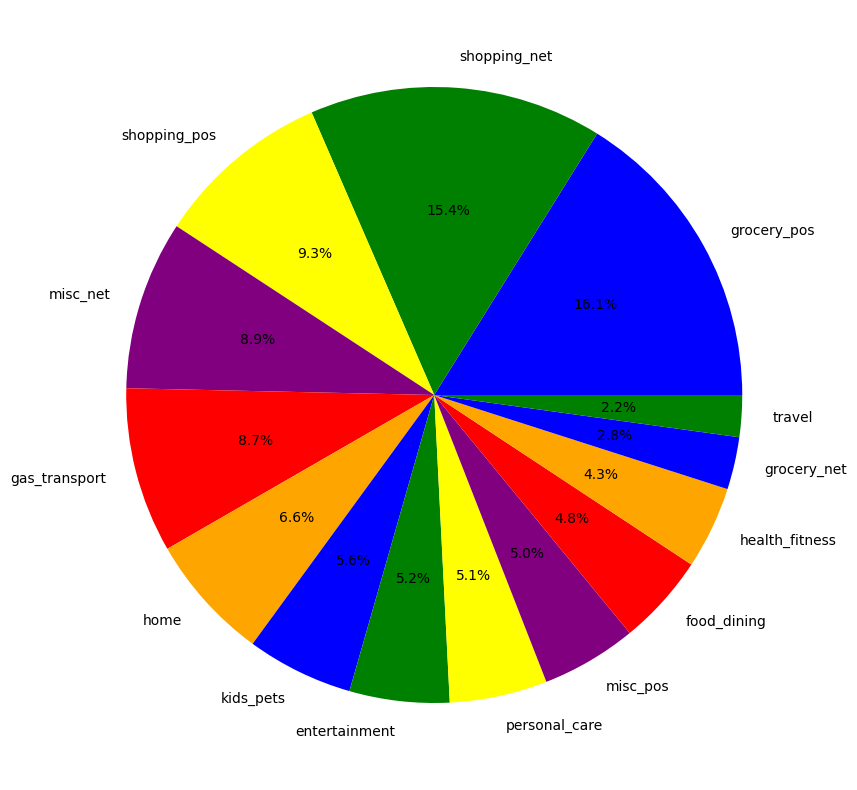

In [113]:
count=df["category"].value_counts()
count
plt.figure(figsize=(10, 10))
a5=["blue","green","yellow","purple","red","orange"]
plt.pie(count,labels=count.index,autopct="%1.1f%%",colors=a5)

here amount is more use for grocery purpose.

<Axes: xlabel='month', ylabel='amt'>

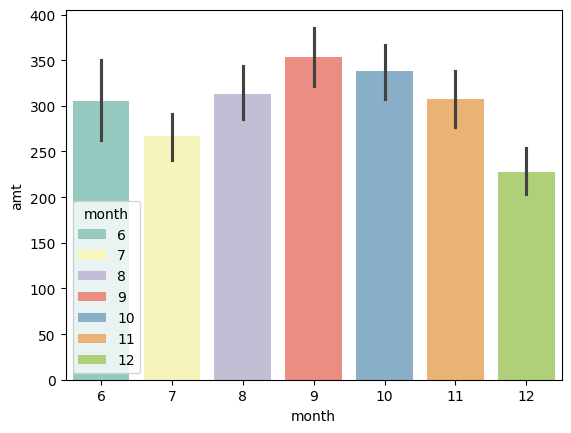

In [123]:
sns.barplot(x="month",y="amt",data=df,palette="Set3",hue="month") 

In [43]:
df.sort_values(['cc_num', 'trans_date_trans_time'],inplace=True)
df['hours_diff_bet_trans']=((df.groupby('cc_num')[['trans_date_trans_time']].diff())/np.timedelta64(1,'h')) 

In [44]:
df.loc[df['hours_diff_bet_trans'].isna(),'hours_diff_bet_trans'] = 0
df['hours_diff_bet_trans'] = df['hours_diff_bet_trans'].astype(int) 

In [45]:
#Make day feature numerical
df['day'] = df['trans_date_trans_time'].dt.weekday

In [46]:
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,hour,day,month,age,distance_km,hours_diff_bet_trans
23228,2020-06-29 08:22:30,60416207185,Kutch-Hegmann,grocery_net,63.12,F,Fort Washakie,82514,1645,Information systems manager,0,8,0,6,34,70.97,0
284652,2020-10-05 17:54:46,60416207185,Turner and Sons,shopping_pos,2.13,F,Fort Washakie,82514,1645,Information systems manager,0,17,0,10,34,25.56,2361
36857,2020-07-04 08:06:37,60422928733,Auer-West,shopping_net,48.08,M,North Augusta,29860,46944,Secondary school teacher,0,8,5,7,78,112.52,0
177680,2020-08-23 00:07:52,60422928733,"Bahringer, Osinski and Block",food_dining,54.26,M,North Augusta,29860,46944,Secondary school teacher,0,0,6,8,78,23.55,1192
425499,2020-12-03 00:58:35,60422928733,Cummerata-Jones,gas_transport,65.40,M,North Augusta,29860,46944,Secondary school teacher,0,0,3,12,78,104.33,2448


In [47]:
df.drop(columns=['cc_num','trans_date_trans_time','city_pop'],inplace=True) 

In [48]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'zip', 'job',
       'is_fraud', 'hour', 'day', 'month', 'age', 'distance_km',
       'hours_diff_bet_trans'],
      dtype='object')

In [49]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
#Convert gender to binary classification
df = pd.get_dummies(df,columns=['gender'],drop_first=True) 

In [51]:
for col in ['city','job','merchant', 'category']:
    df[col] = WOEEncoder().fit_transform(df[col],df['is_fraud']) 

Weight of Evidence (WoE) encoding is a technique commonly used in credit scoring 

WoE encoding focuses on understanding the relationship between a categorical variable and a binary target variable (e.g., fraud or non-fraud in a credit card dataset).

In [52]:
X = df.drop(columns='is_fraud', axis=1)
Y = df['is_fraud'] 

In [53]:
X

,merchant,category,amt,city,zip,job,hour,day,month,age,distance_km,hours_diff_bet_trans,gender_M
23228,-1.791759,-0.619039,63.12,-2.397895,82514,-1.098612,8,0,6,34,70.97,0,False
284652,0.470004,0.145620,2.13,-2.397895,82514,-1.098612,17,0,10,34,25.56,2361,False
36857,1.252763,1.185086,48.08,-1.386294,29860,-1.791759,8,5,7,78,112.52,0,True
177680,0.223144,-1.016547,54.26,-1.386294,29860,-1.791759,0,6,8,78,23.55,1192,True
425499,0.287682,-0.345647,65.40,-1.386294,29860,-1.791759,0,3,12,78,104.33,2448,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61650,0.000000,0.145620,9.78,1.673976,29127,0.575364,20,6,7,26,113.59,165,False
184000,-1.386294,-0.980829,72.39,1.673976,29127,0.575364,19,0,8,26,39.16,1030,False
10419,0.470004,1.185086,2.12,-1.386294,61335,0.367725,6,2,6,64,103.74,0,True
62809,0.510826,-0.345647,47.53,-1.386294,61335,0.367725,4,0,7,64,109.28,453,True


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=5) 

In [55]:
print(X.shape, X_train.shape, X_test.shape)

(4290, 13) (3432, 13) (858, 13)


In [56]:
model = LogisticRegression() 

In [57]:
model.fit(X_train, Y_train)

C:\Users\sanyu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
df.head(5)

,merchant,category,amt,city,zip,job,is_fraud,hour,day,month,age,distance_km,hours_diff_bet_trans,gender_M
23228,-1.791759,-0.619039,63.12,-2.397895,82514,-1.098612,0,8,0,6,34,70.97,0,False
284652,0.470004,0.145620,2.13,-2.397895,82514,-1.098612,0,17,0,10,34,25.56,2361,False
36857,1.252763,1.185086,48.08,-1.386294,29860,-1.791759,0,8,5,7,78,112.52,0,True
177680,0.223144,-1.016547,54.26,-1.386294,29860,-1.791759,0,0,6,8,78,23.55,1192,True
425499,0.287682,-0.345647,65.40,-1.386294,29860,-1.791759,0,0,3,12,78,104.33,2448,True


In [59]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [60]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8513986013986014


In [61]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [62]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8764568764568764


In [63]:
DecisionTree=DecisionTreeClassifier(max_depth=3)
DecisionTree.fit(X_train,Y_train)
y_pred_dt = DecisionTree.predict(X_test)
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
accuracy_dt

0.9545454545454546

In [64]:
random_forest = RandomForestClassifier(random_state=42,n_estimators=100)
random_forest.fit(X_train, Y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
accuracy_rf

0.9883449883449883

In [65]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
y_pred_lr= logistic_regression.predict(X_test)
accuracy_logistic = accuracy_score(Y_test, y_pred_lr)
accuracy_logistic

C:\Users\sanyu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8764568764568764

In [66]:
""" feature_names = list(X.columns)
feature_names = [str(col) for col in feature_names]
class_names = list(map(str, model.classes_))
plt.figure(figsize=(50,50))
tree.plot_tree(DecisionTree,feature_names=feature_names,class_names=class_names,filled=True)
plt.show() """

' feature_names = list(X.columns)\nfeature_names = [str(col) for col in feature_names]\nclass_names = list(map(str, model.classes_))\nplt.figure(figsize=(50,50))\ntree.plot_tree(DecisionTree,feature_names=feature_names,class_names=class_names,filled=True)\nplt.show() '

In [67]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
results = []

In [69]:
for model, preds in zip(models, [y_pred_lr, y_pred_dt, y_pred_rf]):
    accuracy = accuracy_score(Y_test, preds)
    precision = precision_score(Y_test, preds, average='weighted')
    recall = recall_score(Y_test, preds, average='weighted')
    f1 = f1_score(Y_test, preds, average='weighted')
    
    results.append([model, accuracy, precision, recall, f1]) 

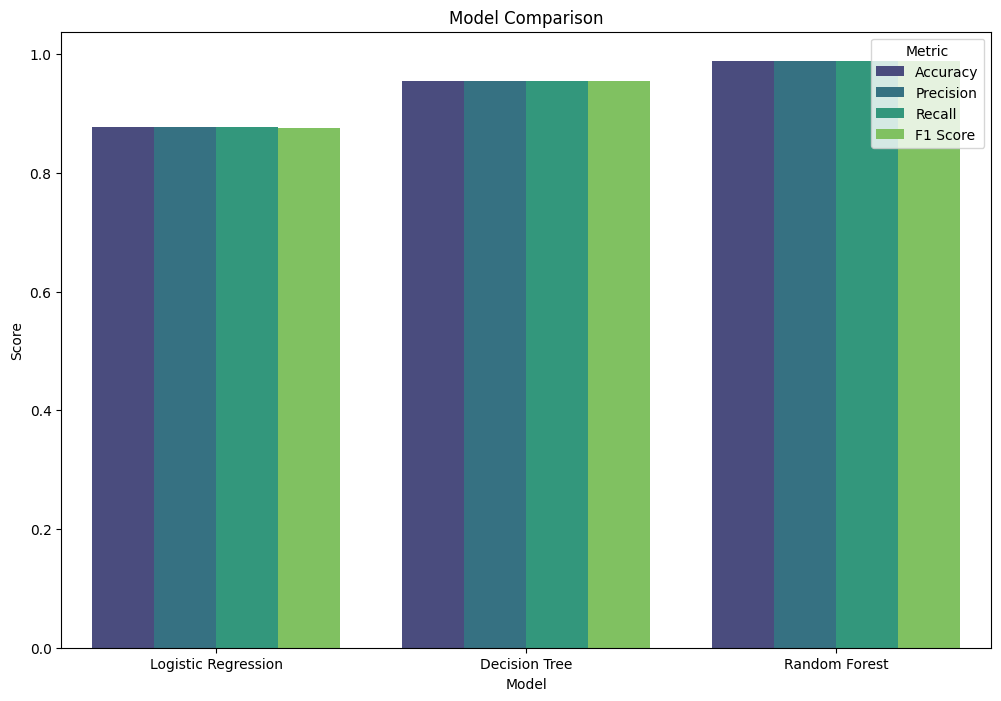

In [74]:
# Create a DataFrame
data = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
data_melted = pd.melt(data, id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=data_melted, palette='viridis')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show() 

In [70]:
import pickle

In [73]:
with open('creditcardfraud.pkl', 'wb') as file:
    pickle.dump(random_forest, file) 